<a href="https://colab.research.google.com/github/VenkataRaji/My-Projects/blob/main/River_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Data pre-processing and cleaning

# importing required packages for data pre-processing 
import pandas as pd
import numpy as np

In [ ]:

url='https://drive.google.com/file/d/1PWoceaP6o0gZZwXM_BgZtofDJMk9QXOh/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)
print(data.head())


         Date  Rainfall_Cavallina  Rainfall_S_Agata  Rainfall_Mangona  \
0  01-01-1998                 NaN               NaN               NaN   
1  02-01-1998                 NaN               NaN               NaN   
2  03-01-1998                 NaN               NaN               NaN   
3  04-01-1998                 NaN               NaN               NaN   
4  05-01-1998                 NaN               NaN               NaN   

   Rainfall_S_Piero  Rainfall_Vernio  Rainfall_Stia  Rainfall_Consuma  \
0               NaN              NaN            NaN               NaN   
1               NaN              NaN            NaN               NaN   
2               NaN              NaN            NaN               NaN   
3               NaN              NaN            NaN               NaN   
4               NaN              NaN            NaN               NaN   

   Rainfall_Incisa  Rainfall_Montevarchi  Rainfall_S_Savino  \
0              NaN                   NaN                NaN

In [ ]:
print(list(data.columns))

['Date', 'Rainfall_Cavallina', 'Rainfall_S_Agata', 'Rainfall_Mangona', 'Rainfall_S_Piero', 'Rainfall_Vernio', 'Rainfall_Stia', 'Rainfall_Consuma', 'Rainfall_Incisa', 'Rainfall_Montevarchi', 'Rainfall_S_Savino', 'Rainfall_Laterina', 'Rainfall_Bibbiena', 'Rainfall_Camaldoli', 'Temperature_Firenze', 'Hydrometry_Nave_di_Rosano ']


In [ ]:
# data pre-processing//
from datetime import datetime, date
data['Date']=pd.to_datetime(data.Date,format='%d-%m-%Y')
missing=data.isnull().sum()
missingdata=(missing/len(data['Date']))*100
print(missingdata)

Date                           0.024334
Rainfall_Cavallina            26.682078
Rainfall_S_Agata              26.682078
Rainfall_Mangona              26.682078
Rainfall_S_Piero              26.682078
Rainfall_Vernio               47.889038
Rainfall_Stia                 84.389828
Rainfall_Consuma              84.389828
Rainfall_Incisa               44.421462
Rainfall_Montevarchi          79.961066
Rainfall_S_Savino             84.389828
Rainfall_Laterina             84.389828
Rainfall_Bibbiena             71.067040
Rainfall_Camaldoli            84.389828
Temperature_Firenze           24.662368
Hydrometry_Nave_di_Rosano      0.608347
dtype: float64


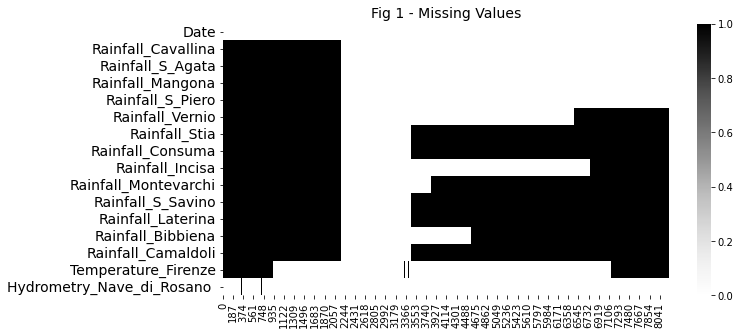

In [ ]:

# Preprocessed data visualisation

# importing the required packages for visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# plotting heatmap for the missing values 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
sns.heatmap(data.T.isna(), cmap='Greys')
ax.set_title('Fig 1 - Missing Values', fontsize=14)

for i in ax.yaxis.get_major_ticks():
    i.label.set_fontsize(14)

plt.show()

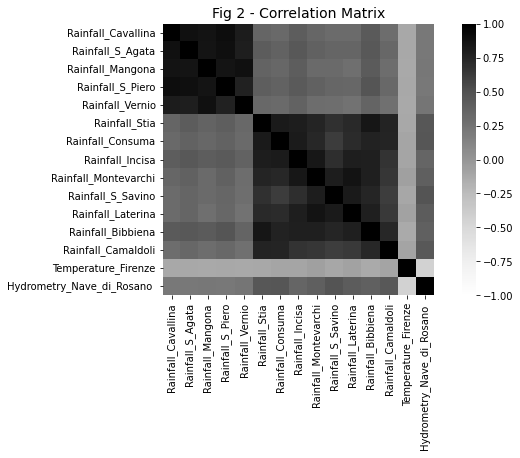

In [ ]:
# correlation matrix visualisation//
fig, ax = plt.subplots(figsize=(10,5)) 
ax.set_title('Fig 2 - Correlation Matrix', fontsize=14)
ax = sns.heatmap(data.corr(), vmin=-1, vmax=1, center=0, cmap='Greys', square=True)

In [ ]:
# training the model with the preprocessed data
data = data.dropna()
data = data.reset_index(drop=True)
train_size = 0.67
rfe_train_test = int(len(data)*train_size)
rfe_train, rfe_test = data[0:rfe_train_test-1], data[rfe_train_test:len(data)]

In [ ]:
# implementing Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesRegressor

rfe_test = data.drop(['Date', 'Temperature_Firenze'], axis=1)

estimator = ExtraTreesRegressor()

y_test_feature = rfe_test['Hydrometry_Nave_di_Rosano ']  
X_test_feature = rfe_test.drop('Hydrometry_Nave_di_Rosano ', axis=1)

selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_test_feature.values, y_test_feature)

select1 = pd.DataFrame(selector.ranking_, columns=['Ranking'])

best_rainfall_1 = rfe_test.columns[select1.index[select1['Ranking'] == 1][0]]
best_rainfall_2 = rfe_test.columns[select1.index[select1['Ranking'] == 2][0]]
best_rainfall_3 = rfe_test.columns[select1.index[select1['Ranking'] == 3][0]]

print(f'Best rainfall region: {best_rainfall_1}')
print(f'Second best rainfall region: {best_rainfall_2}')
print(f'Third best rainfall region: {best_rainfall_3}')

data['Rainfall'] = data[best_rainfall_1]+data[best_rainfall_2]+data[best_rainfall_3]


from statsmodels.tsa.seasonal import seasonal_decompose

df = data[['Date', 'Rainfall', 'Temperature_Firenze', 'Hydrometry_Nave_di_Rosano ']]

decompose_columns =  ['Rainfall', 'Temperature_Firenze', 'Hydrometry_Nave_di_Rosano ']

for column in decompose_columns:
    decompose_data = seasonal_decompose(df[column], freq=52, model='additive', extrapolate_trend='freq')
    df[f"{column}_Trend"] = decompose_data.trend
    df[f"{column}_Seasonal"] = decompose_data.seasonal

df = df.dropna()
df = df.reset_index(drop=True)


Best rainfall region: Hydrometry_Nave_di_Rosano 
Second best rainfall region: Rainfall_Bibbiena
Third best rainfall region: Rainfall_Consuma


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


AttributeError: ignored

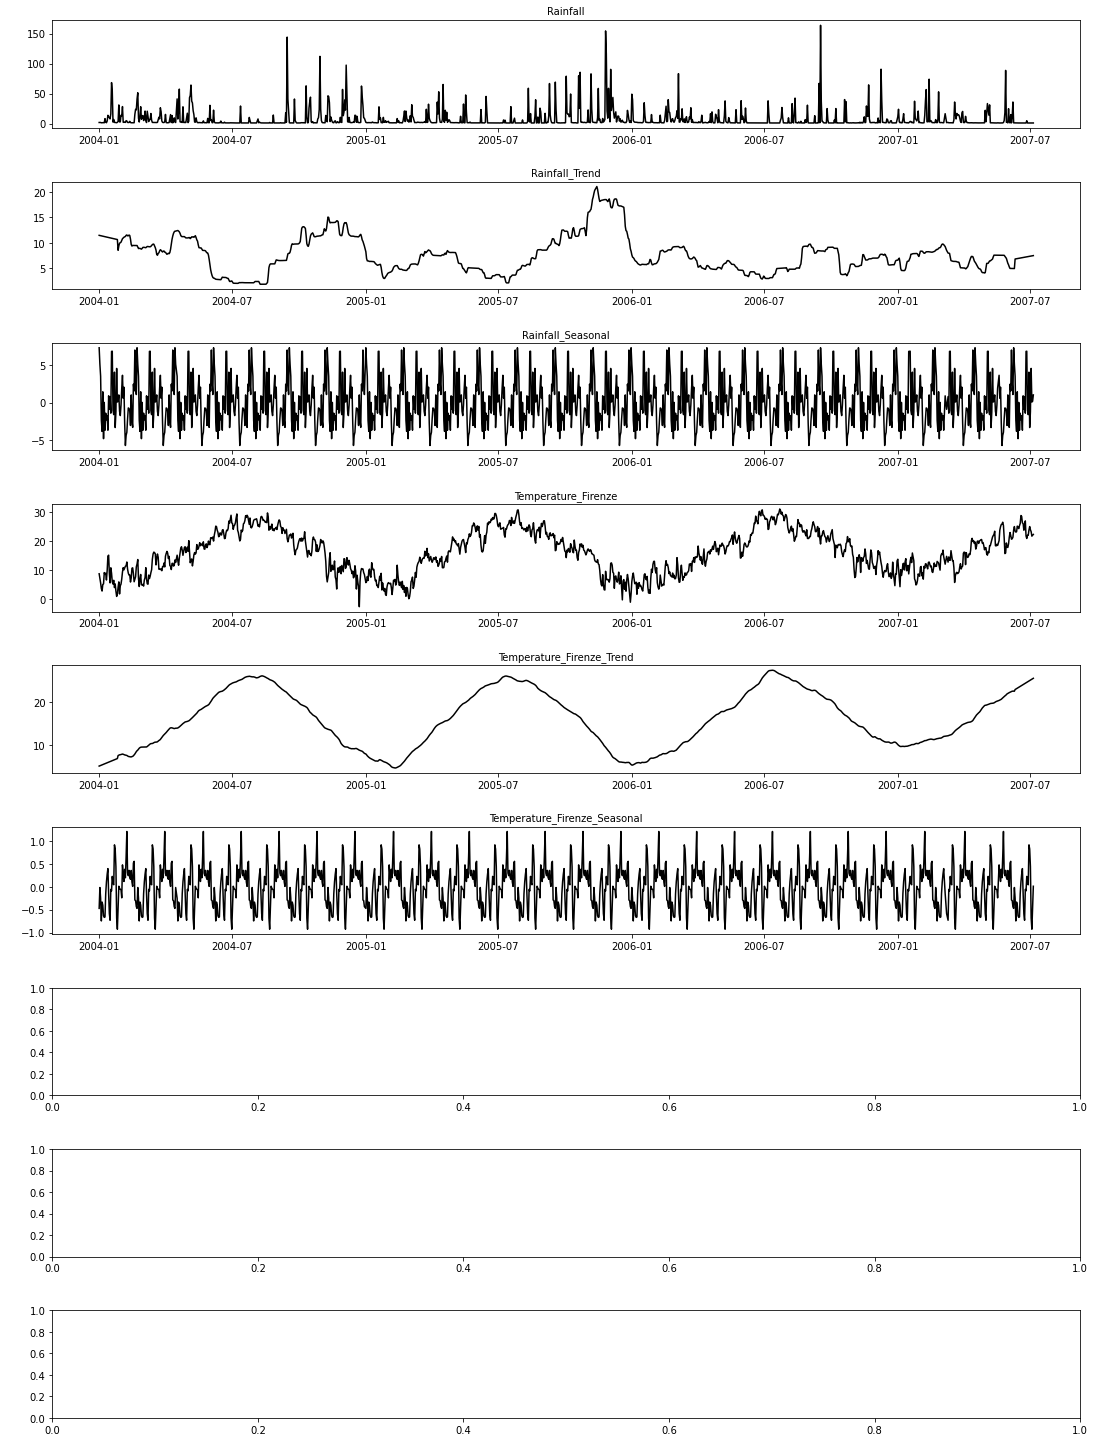

In [ ]:
# Visualisations of the RFE results as trends 

f, ax = plt.subplots(nrows=9, ncols=1, figsize=(15, 20))
f.tight_layout()
f.subplots_adjust(hspace=0.5)

sns.lineplot(x=df.Date, y=df.Rainfall, ax=ax[0], color='black')
ax[0].set_title('Rainfall', fontsize=10)
ax[0].set_ylabel(ylabel=' ')
ax[0].set_xlabel(xlabel=' ')

sns.lineplot(x=df.Date, y=df.Rainfall_Trend, ax=ax[1], color='black')
ax[1].set_title('Rainfall_Trend', fontsize=10)
ax[1].set_ylabel(ylabel=' ')
ax[1].set_xlabel(xlabel=' ')

sns.lineplot(x=df.Date, y=df.Rainfall_Seasonal, ax=ax[2], color='black')
ax[2].set_title('Rainfall_Seasonal', fontsize=10)
ax[2].set_ylabel(ylabel=' ')
ax[2].set_xlabel(xlabel=' ')

sns.lineplot(x=df.Date, y=df.Temperature_Firenze, ax=ax[3], color='black')
ax[3].set_title('Temperature_Firenze', fontsize=10)
ax[3].set_ylabel(ylabel=' ')
ax[3].set_xlabel(xlabel=' ')

sns.lineplot(x=df.Date, y=df.Temperature_Firenze_Trend, ax=ax[4], color='black')
ax[4].set_title('Temperature_Firenze_Trend', fontsize=10)
ax[4].set_ylabel(ylabel=' ')
ax[4].set_xlabel(xlabel=' ')

sns.lineplot(x=df.Date, y=df.Temperature_Firenze_Seasonal, ax=ax[5], color='black')
ax[5].set_title('Temperature_Firenze_Seasonal', fontsize=10)
ax[5].set_ylabel(ylabel=' ')
ax[5].set_xlabel(xlabel=' ')

sns.lineplot(x=df.Date, y=df.Hydrometry_Nave_di_Rosano, ax=ax[6], color='black')
ax[6].set_title('Hydrometry_Nave_di_Rosano', fontsize=10)
ax[6].set_ylabel(ylabel=' ')
ax[6].set_xlabel(xlabel=' ')

sns.lineplot(x=df.Date, y=df.Hydrometry_Nave_di_Rosano_Trend, ax=ax[7], color='black')
ax[7].set_title('Hydrometry_Nave_di_Rosano_Trend', fontsize=10)
ax[7].set_ylabel(ylabel=' ')
ax[7].set_xlabel(xlabel=' ')

sns.lineplot(x=df.Date, y=df.Hydrometry_Nave_di_Rosano_Seasonal, ax=ax[8], color='black')
ax[8].set_title('Hydrometry_Nave_di_Rosano_Seasonal', fontsize=10)
ax[8].set_ylabel(ylabel=' ')

for i in range(9):
    ax[i].set_xlim([date(2004, 1, 1), date(2007, 7, 30)])

plt.show()

In [ ]:
# implementing Long Short Term Memory(LSTM)

import math
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

df = data.drop('Date', axis=1)

scaler = MinMaxScaler(feature_range = (0, 1))
df_norm = scaler.fit_transform(df.values)
df = pd.DataFrame(df_norm, index=df.index, columns=df.columns)

def lstm_predict(df_norm, target_column, train_size, look_back=1, neurons=20, epochs=50, verbose=1):
  '''
  df_norm: DataFrame normalized
  target_column: title referring to target column
  train_size: percentage of DataFrame for training
  look_back: period of LSTM window
  layers: number of layers
  epochs: number of epochs
  '''
  
  train_test = int(len(df_norm)*train_size)
  df_train, df_test = df_norm[0:train_test], df[train_test:len(df_norm)]

  df_train = df_train.dropna()
  df_train = df_train.reset_index(drop=True)
  df_test = df_test.dropna()
  df_test = df_test.reset_index(drop=True)

  dataA, dataB, dataC, dataD = [], [], [], []

  for i in range(len(df_train)-look_back):
      a = df_train[i:(i+look_back)].to_numpy()
      dataA.append(a)
      dataB.append(df_train[target_column].loc[[i+look_back]].to_numpy())

  x_train, y_train = np.asarray(dataA, dtype=np.float32), np.asarray(dataB, dtype=np.float32)

  for i in range(len(df_test)-look_back):
      a = df_test[i:(i+look_back)].to_numpy()
      dataC.append(a)
      dataD.append(df_test[target_column].loc[[i+look_back]].to_numpy())

  x_test, y_test = np.asarray(dataC, dtype=np.float32), np.asarray(dataD, dtype=np.float32)

  model = Sequential()
  model.add(LSTM(neurons, batch_input_shape=(1, x_train.shape[1], x_train.shape[2]), stateful=True))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer='adam')

  model.fit(x_train, y_train, epochs=epochs, batch_size=1, verbose=verbose)

  train_predict = model.predict(x_train, batch_size=1)
  test_predict = model.predict(x_test, batch_size=1)

  prev_treino_dataset = np.zeros(shape=(len(train_predict), x_train.shape[2]))
  prev_treino_dataset[:,df.columns.get_loc(target_column)] = train_predict[:,0]
  train_predict = scaler.inverse_transform(prev_treino_dataset)[:,df.columns.get_loc(target_column)]

  prev_test_dataset = np.zeros(shape=(len(test_predict), x_test.shape[2]))
  prev_test_dataset[:,df.columns.get_loc(target_column)] = test_predict[:,0]
  test_predict = scaler.inverse_transform(prev_test_dataset)[:,df.columns.get_loc(target_column)]

  prev_y_train_dataset = np.zeros(shape=(len(y_train), x_train.shape[2]))
  prev_y_train_dataset[:,df.columns.get_loc(target_column)] = y_train[:,0]
  y_train_ = scaler.inverse_transform(prev_y_train_dataset)[:,df.columns.get_loc(target_column)]

  prev_y_test_dataset = np.zeros(shape=(len(y_test), x_test.shape[2]))
  prev_y_test_dataset[:,df.columns.get_loc(target_column)] = y_test[:,0]
  y_test_ = scaler.inverse_transform(prev_y_test_dataset)[:,df.columns.get_loc(target_column)]

  return y_train_, train_predict, y_test_, test_predict

model = lstm_predict(df, target_column='Hydrometry_Nave_di_Rosano ', train_size=train_size, look_back=30, neurons=2, epochs=150)


Epoch 1/150
824/824 [==============================] - 9s 8ms/step - loss: 0.0110
Epoch 2/150
824/824 [==============================] - 5s 6ms/step - loss: 0.0053
Epoch 3/150
824/824 [==============================] - 4s 5ms/step - loss: 0.0044
Epoch 4/150
824/824 [==============================] - 5s 6ms/step - loss: 0.0041
Epoch 5/150
824/824 [==============================] - 4s 5ms/step - loss: 0.0039
Epoch 6/150
824/824 [==============================] - 4s 5ms/step - loss: 0.0037
Epoch 7/150
824/824 [==============================] - 5s 6ms/step - loss: 0.0036
Epoch 8/150
824/824 [==============================] - 5s 6ms/step - loss: 0.0035
Epoch 9/150
824/824 [==============================] - 5s 5ms/step - loss: 0.0034
Epoch 10/150
824/824 [==============================] - 4s 5ms/step - loss: 0.0035
Epoch 11/150
824/824 [==============================] - 5s 6ms/step - loss: 0.0034
Epoch 12/150
824/824 [==============================] - 5s 6ms/step - loss: 0.0033
Epoch 13/150


In [ ]:
# MAE and RSME train and test scores

score_train_mae = mean_absolute_error(model[0], model[1])
score_test_mae = mean_absolute_error(model[2], model[3])

score_train_rsme = math.sqrt(mean_squared_error(model[0], model[1]))
score_test_rsme = math.sqrt(mean_squared_error(model[2], model[3]))

print(f'MAE Train: {score_train_mae} \nMAE Test: {score_test_mae}')
print(f'RSME Train: {score_train_rsme} \nRSME Test: {score_test_rsme}')

MAE Train: 0.11740227476535454 
MAE Test: 0.09596202450761647
RSME Train: 0.20511786382151165 
RSME Test: 0.17084632655903956


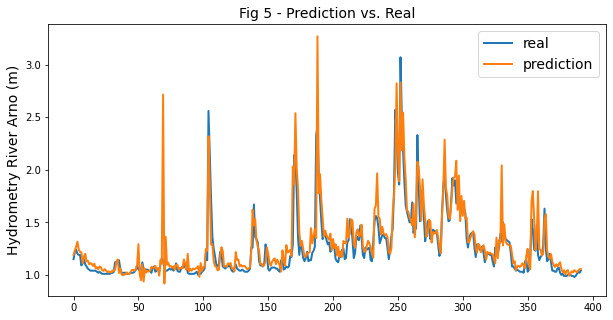

In [ ]:
# model's prediction

fig, ax = plt.subplots(1, figsize=(10,5))
ax.set_title('Fig 5 - Prediction vs. Real', fontsize=14)
ax.plot(model[2], label='real', linewidth=2)
ax.plot(model[3], label='prediction', linewidth=2)
ax.set_ylabel('Hydrometry River Arno (m)', fontsize=14)
ax.legend(loc='best', fontsize=14)
plt.show()